<a href="https://colab.research.google.com/github/MarcelaMonteiroMontenegroGallo/Python/blob/master/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

from google.colab import files
uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [0]:
import pandas as pd

In [0]:
telco = pd.read_csv('Churn.csv')

In [0]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [0]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [0]:
#@title
# Adapt your code to compute the standard deviation
print(telco.groupby(['Churn']).mean())

       Account_Length  Vmail_Message  ...  Intl_Charge   Area_Code
Churn                                 ...                         
no         100.793684       8.604561  ...     2.743404  437.074737
yes        102.664596       5.115942  ...     2.889545  437.817805

[2 rows x 16 columns]


In [0]:
# Adapt your code to compute the standard deviation
print(telco.groupby(['Churn']).std())

       Account_Length  Vmail_Message  ...  Intl_Charge  Area_Code
Churn                                 ...                        
no           39.88235      13.913125  ...     0.751784  42.306156
yes          39.46782      11.860138  ...     0.754152  42.792270

[2 rows x 16 columns]


In [0]:
print(telco.groupby(['Churn', 'CustServ_Calls']).std())

                      Account_Length  Vmail_Message  ...  Intl_Charge  Area_Code
Churn CustServ_Calls                                 ...                        
no    0                    39.309304      14.154119  ...     0.765048  41.894778
      1                    40.047102      13.955008  ...     0.748270  41.566743
      2                    40.673845      13.946907  ...     0.745023  42.195354
      3                    39.803919      13.079563  ...     0.757905  44.692317
      4                    35.513251      13.984944  ...     0.731180  40.956950
      5                    35.086202      14.605636  ...     0.795672  45.707178
      6                    65.638485      15.449804  ...     0.735021  50.699218
      7                    24.013885      20.838666  ...     0.351888  48.778411
      8                          NaN            NaN  ...          NaN        NaN
yes   0                    41.059086      10.971421  ...     0.745204  43.757738
      1                    3

In [0]:
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

In [0]:
import matplotlib as plt
import seaborn as sns 

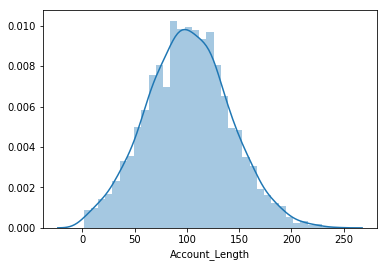

In [0]:
sns.distplot(telco['Account_Length'])

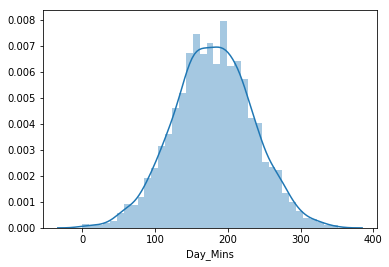

In [0]:
sns.distplot(telco['Day_Mins'])

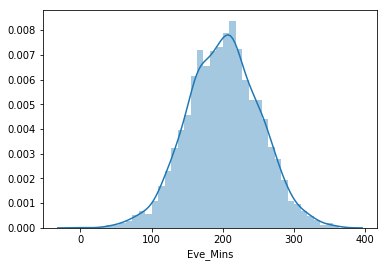

In [0]:
sns.distplot(telco['Eve_Mins'])

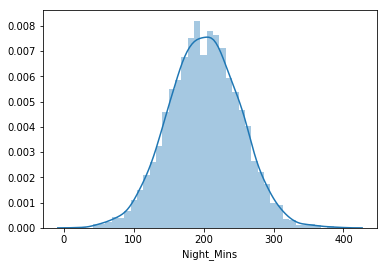

In [0]:
sns.distplot(telco['Night_Mins'])

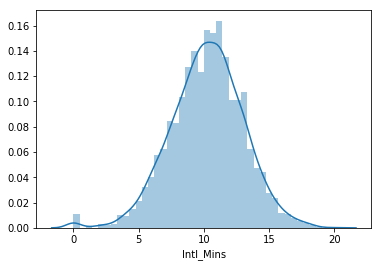

In [0]:
sns.distplot(telco['Intl_Mins'])

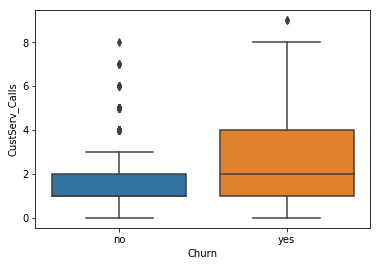

In [0]:
sns.boxplot(x='Churn',
            y='CustServ_Calls',
            data= telco)

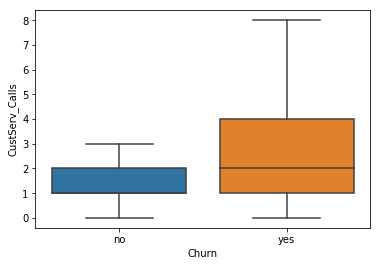

In [0]:
sns.boxplot(x='Churn',
            y='CustServ_Calls',
            data= telco,
           sym = "")

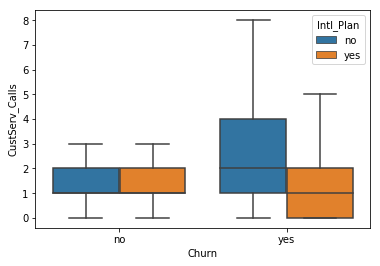

In [0]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = 'Intl_Plan')

## **DATA PREPROCESSING**

In [0]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan          object
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [0]:
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0 ,'yes' :1})
telco['Churn'] = telco['Churn'].replace({'no':0 , 'yes':1})


In [0]:
telco['Churn'] = telco['dtype'].replace({'no':0 , 'yes':1})

KeyError: ignored

In [0]:
# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [0]:
telco_state = pd.get_dummies(telco['State'])
print(telco_state)

**Escalonar**

In [0]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler


In [0]:
# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())

In [0]:


# Scale telco
telco_scaled = StandardScaler().fit_transform(telco)



ValueError: ignored

In [0]:
telco = telco.drop(['Area_Code','Phone'], axis=1)

In [0]:
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']

In [12]:
print(telco['Avg_Night_Calls'].head(5))

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64
